[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pahadian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 0, Loss: 9.151304402652551
Epoch 500, Loss: 2.0092571872194367
Epoch 1000, Loss: 2.1619903315669458
Epoch 1500, Loss: 2.770268528847674
Epoch 2000, Loss: 6.198149900437458
Epoch 2500, Loss: 20.72489346200307
Epoch 3000, Loss: 80.915204039179


C:\Users\pahadian\AppData\Local\Temp\ipykernel_22952\2057265735.py:59: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(probs[t_index])


Epoch 3500, Loss: inf
Epoch 4000, Loss: inf
Epoch 4500, Loss: inf


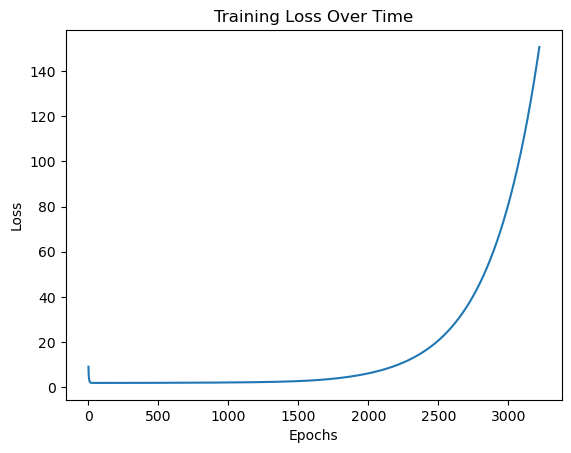

Similarity between 'fox' and 'dog': 0.7570


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder

nltk.download('punkt')

corpus = "The quick brown fox jumps over the lazy dog. The dog barks at the fox."

words = word_tokenize(corpus.lower())
vocab = list(set(words))
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

def generate_training_data(words, window_size=2):
    training_data = []
    for i, word in enumerate(words):
        center_word = word
        context_words = words[max(0, i - window_size) : i] + words[i + 1 : min(len(words), i + window_size + 1)]
        training_data.extend([(center_word, context) for context in context_words])
    return training_data

training_data = generate_training_data(words)

dim = 50  # Embedding size
learning_rate = 0.01
epochs = 5000

U = np.random.randn(vocab_size, dim)
V = np.random.randn(vocab_size, dim)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / exp_x.sum()

losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in training_data:
        c_index = word_to_index[center]
        t_index = word_to_index[context]
        
        Uc = U[c_index]
        scores = np.dot(V, Uc)
        probs = softmax(scores)
        
        loss = -np.log(probs[t_index])
        total_loss += loss
        
        probs[t_index] -= 1
        
        U[c_index] -= learning_rate * np.dot(probs, V)
        V -= learning_rate * np.outer(probs, Uc)
    
    losses.append(total_loss / len(training_data))
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(training_data)}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

def cosine_similarity(word1, word2):
    vec1 = U[word_to_index[word1]]
    vec2 = U[word_to_index[word2]]
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1, word2 = "fox", "dog"
print(f"Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pahadian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 0, Loss: 4.645258852717209
Epoch 500, Loss: 1.70253529505455
Epoch 1000, Loss: 1.7217196307693674
Epoch 1500, Loss: 1.7552769113363795
Epoch 2000, Loss: 1.8174982025288313
Epoch 2500, Loss: 1.9534759201379088
Epoch 3000, Loss: 2.471580349519775
Epoch 3500, Loss: 5.740023037416992
Epoch 4000, Loss: 19.998645531806186
Epoch 4500, Loss: 80.84167984621838


C:\Users\pahadian\AppData\Local\Temp\ipykernel_22952\4292580920.py:59: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(probs[t_index])


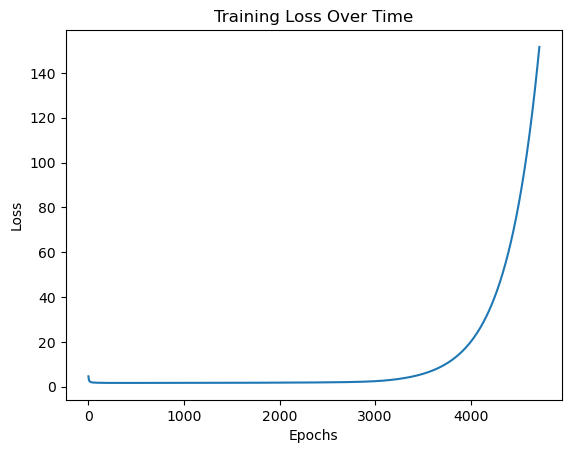

Similarity between 'fox' and 'dog': -0.0506


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder

nltk.download('punkt')

corpus = "The quick brown fox jumps over the lazy dog. The dog barks at the fox."


words = word_tokenize(corpus.lower())
vocab = list(set(words))
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

def generate_training_data(words, window_size=2):
    training_data = []
    for i, word in enumerate(words):
        center_word = word
        context_words = words[max(0, i - window_size) : i] + words[i + 1 : min(len(words), i + window_size + 1)]
        training_data.extend([(center_word, context) for context in context_words])
    return training_data

training_data = generate_training_data(words)

dim = 10  
learning_rate = 0.01
epochs = 5000

U = np.random.randn(vocab_size, dim)
V = np.random.randn(vocab_size, dim)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / exp_x.sum()

losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in training_data:
        c_index = word_to_index[center]
        t_index = word_to_index[context]
        
        Uc = U[c_index]
        scores = np.dot(V, Uc)
        probs = softmax(scores)
        
        loss = -np.log(probs[t_index])
        total_loss += loss
        
        probs[t_index] -= 1
        
        U[c_index] -= learning_rate * np.dot(probs, V)
        V -= learning_rate * np.outer(probs, Uc)
    
    losses.append(total_loss / len(training_data))
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(training_data)}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

def cosine_similarity(word1, word2):
    vec1 = U[word_to_index[word1]]
    vec2 = U[word_to_index[word2]]
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1, word2 = "fox", "dog"
print(f"Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pahadian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\pahadian\AppData\Local\Temp\ipykernel_22952\777138376.py:59: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(probs[t_index])


Epoch 0, Loss: 20.700182283936012
Epoch 500, Loss: inf
Epoch 1000, Loss: inf
Epoch 1500, Loss: inf
Epoch 2000, Loss: inf


C:\Users\pahadian\AppData\Local\Temp\ipykernel_22952\777138376.py:41: RuntimeWarning: overflow encountered in subtract
  exp_x = np.exp(x - np.max(x))  # For numerical stability
C:\Users\pahadian\AppData\Local\Temp\ipykernel_22952\777138376.py:41: RuntimeWarning: invalid value encountered in subtract
  exp_x = np.exp(x - np.max(x))  # For numerical stability


Epoch 2500, Loss: nan


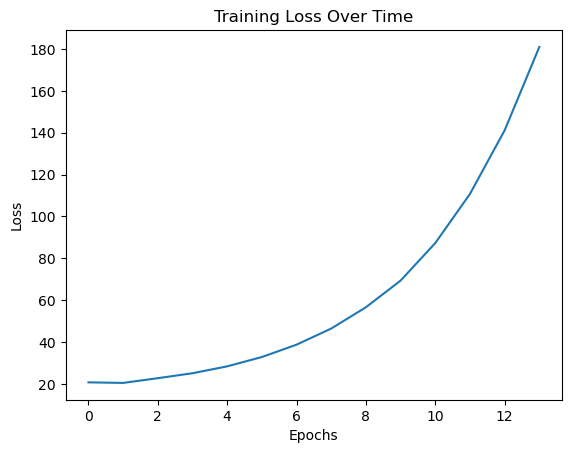

Similarity between 'fox' and 'dog': nan


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder

nltk.download('punkt')

corpus = "The quick brown fox jumps over the lazy dog. The dog barks at the fox."

words = word_tokenize(corpus.lower())
vocab = list(set(words))
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

def generate_training_data(words, window_size=2):
    training_data = []
    for i, word in enumerate(words):
        center_word = word
        context_words = words[max(0, i - window_size) : i] + words[i + 1 : min(len(words), i + window_size + 1)]
        training_data.extend([(center_word, context) for context in context_words])
    return training_data

training_data = generate_training_data(words)

dim = 100  
learning_rate = 0.1
epochs = 3000

U = np.random.randn(vocab_size, dim)
V = np.random.randn(vocab_size, dim)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  #
    return exp_x / exp_x.sum()

losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in training_data:
        c_index = word_to_index[center]
        t_index = word_to_index[context]
        
        Uc = U[c_index]
        scores = np.dot(V, Uc)
        probs = softmax(scores)
        
        loss = -np.log(probs[t_index])
        total_loss += loss
        
        probs[t_index] -= 1
        
        U[c_index] -= learning_rate * np.dot(probs, V)
        V -= learning_rate * np.outer(probs, Uc)
    
    losses.append(total_loss / len(training_data))
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(training_data)}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

def cosine_similarity(word1, word2):
    vec1 = U[word_to_index[word1]]
    vec2 = U[word_to_index[word2]]
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1, word2 = "fox", "dog"
print(f"Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pahadian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 0, Loss: 13.083158682382832
Epoch 500, Loss: 2.6154574226207816
Epoch 1000, Loss: 3.948782974226628
Epoch 1500, Loss: 10.239304456337406
Epoch 2000, Loss: 36.01380970410569
Epoch 2500, Loss: 140.34243354523252


C:\Users\pahadian\AppData\Local\Temp\ipykernel_22952\443110096.py:59: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(probs[t_index])


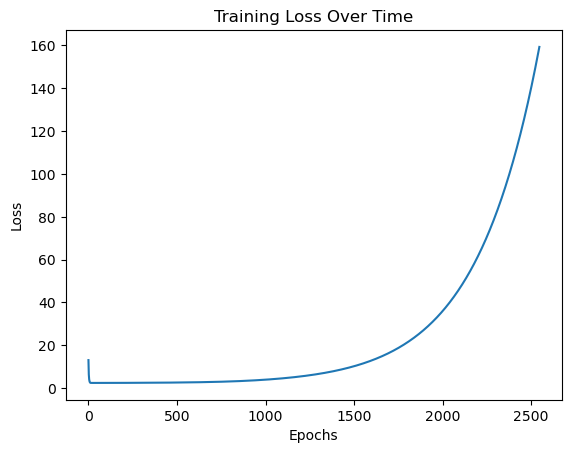

Similarity between 'fox' and 'dog': 0.2200


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder

nltk.download('punkt')

corpus = "The quick brown fox jumps over the lazy dog. The dog barks at the fox."

words = word_tokenize(corpus.lower())
vocab = list(set(words))
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

def generate_training_data(words, window_size=2):
    training_data = []
    for i, word in enumerate(words):
        center_word = word
        context_words = words[max(0, i - window_size) : i] + words[i + 1 : min(len(words), i + window_size + 1)]
        training_data.extend([(center_word, context) for context in context_words])
    return training_data

training_data = generate_training_data(words)

dim = 100 
learning_rate = 0.01
epochs = 3000

U = np.random.randn(vocab_size, dim)
V = np.random.randn(vocab_size, dim)

def softmax(x):
    exp_x = np.exp(x - np.max(x)) 
    return exp_x / exp_x.sum()

losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in training_data:
        c_index = word_to_index[center]
        t_index = word_to_index[context]
        
        Uc = U[c_index]
        scores = np.dot(V, Uc)
        probs = softmax(scores)
        
        loss = -np.log(probs[t_index])
        total_loss += loss
        
        probs[t_index] -= 1
        
        U[c_index] -= learning_rate * np.dot(probs, V)
        V -= learning_rate * np.outer(probs, Uc)
    
    losses.append(total_loss / len(training_data))
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(training_data)}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

def cosine_similarity(word1, word2):
    vec1 = U[word_to_index[word1]]
    vec2 = U[word_to_index[word2]]
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1, word2 = "fox", "dog"
print(f"Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pahadian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 0, Loss: 4.2369603292013505


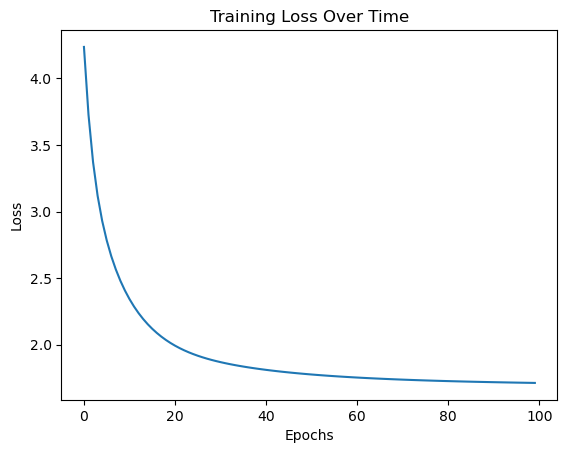

Similarity between 'fox' and 'dog': 0.5074


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder

nltk.download('punkt')

corpus = "The quick brown fox jumps over the lazy dog. The dog barks at the fox."

words = word_tokenize(corpus.lower())
vocab = list(set(words))
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

def generate_training_data(words, window_size=2):
    training_data = []
    for i, word in enumerate(words):
        center_word = word
        context_words = words[max(0, i - window_size) : i] + words[i + 1 : min(len(words), i + window_size + 1)]
        training_data.extend([(center_word, context) for context in context_words])
    return training_data

training_data = generate_training_data(words)

dim = 10  
learning_rate = 0.01
epochs = 100

U = np.random.randn(vocab_size, dim)
V = np.random.randn(vocab_size, dim)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / exp_x.sum()

losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in training_data:
        c_index = word_to_index[center]
        t_index = word_to_index[context]
        
        Uc = U[c_index]
        scores = np.dot(V, Uc)
        probs = softmax(scores)
        
        loss = -np.log(probs[t_index])
        total_loss += loss
        
        probs[t_index] -= 1
        
        U[c_index] -= learning_rate * np.dot(probs, V)
        V -= learning_rate * np.outer(probs, Uc)
    
    losses.append(total_loss / len(training_data))
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(training_data)}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

def cosine_similarity(word1, word2):
    vec1 = U[word_to_index[word1]]
    vec2 = U[word_to_index[word2]]
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1, word2 = "fox", "dog"
print(f"Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pahadian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 0, Loss: 12.496915854941939


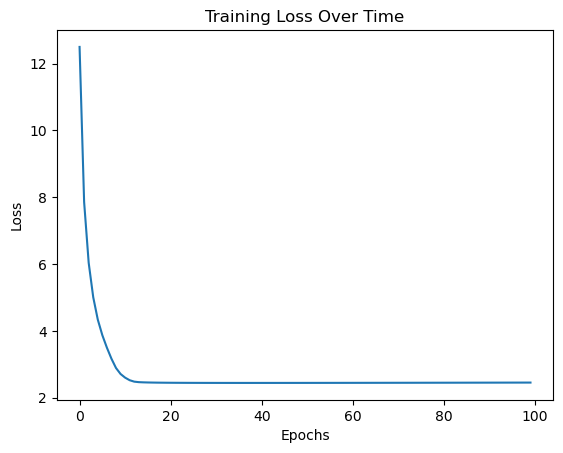

Similarity between 'fox' and 'dog': 0.0912


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder

nltk.download('punkt')

corpus = "The quick brown fox jumps over the lazy dog. The dog barks at the fox."

words = word_tokenize(corpus.lower())
vocab = list(set(words))
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

def generate_training_data(words, window_size=2):
    training_data = []
    for i, word in enumerate(words):
        center_word = word
        context_words = words[max(0, i - window_size) : i] + words[i + 1 : min(len(words), i + window_size + 1)]
        training_data.extend([(center_word, context) for context in context_words])
    return training_data

training_data = generate_training_data(words)

dim = 100 
learning_rate = 0.01
epochs = 100

U = np.random.randn(vocab_size, dim)
V = np.random.randn(vocab_size, dim)

def softmax(x):
    exp_x = np.exp(x - np.max(x)) 
    return exp_x / exp_x.sum()

losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in training_data:
        c_index = word_to_index[center]
        t_index = word_to_index[context]
        
        Uc = U[c_index]
        scores = np.dot(V, Uc)
        probs = softmax(scores)
        
        loss = -np.log(probs[t_index])
        total_loss += loss
        
        probs[t_index] -= 1
        
        U[c_index] -= learning_rate * np.dot(probs, V)
        V -= learning_rate * np.outer(probs, Uc)
    
    losses.append(total_loss / len(training_data))
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(training_data)}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

def cosine_similarity(word1, word2):
    vec1 = U[word_to_index[word1]]
    vec2 = U[word_to_index[word2]]
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1, word2 = "fox", "dog"
print(f"Similarity between '{word1}' and '{word2}': {cosine_similarity(word1, word2):.4f}")

